**Create a model to predict a house's value. We want to be able to understand what creates value in a house.**

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier 
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df_small = pd.read_csv('datasets/melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv')
df = pd.read_csv('datasets/melbourne-housing-market/Melbourne_housing_FULL.csv')

In [3]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [4]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


# Feature engineering

In [6]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [7]:
# look at nulls/drops - drop columns not null & outliers (for target variable - drop those rows?)
# feature transformation?
# for logistic regression & feature_importances
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
# additional performance metrics
    
#check RFR score
#check X/Y relationship

df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [8]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [9]:
features = df.drop(['Landsize','BuildingArea','Lattitude','Longtitude'], axis=1)
features = features.dropna(subset=['Price','Car'])
features.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
YearBuilt        8535
CouncilArea         0
Regionname          0
Propertycount       0
dtype: int64

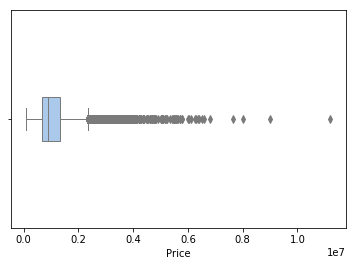

In [10]:
sns.boxplot(features['Price'], linewidth=1, width=0.2, palette='pastel', orient='h')

In [11]:
print(np.sort(features.Price)[-10:])

[ 6300000.  6370000.  6400000.  6500000.  6600000.  6800000.  7650000.
  8000000.  9000000. 11200000.]


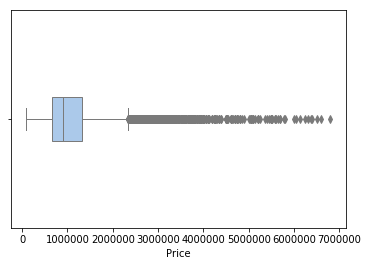

In [12]:
features = features[features.Price < 7650000.0]
sns.boxplot(features['Price'], linewidth=1, width=0.2, palette='pastel', orient='h')

In [13]:
features.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
YearBuilt        8534
CouncilArea         0
Regionname          0
Propertycount       0
dtype: int64

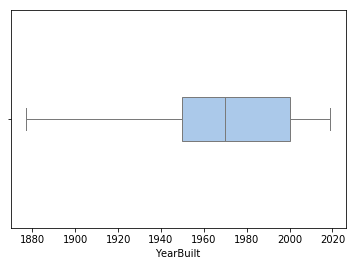

In [14]:
features = features[features.YearBuilt > 1875.0]
sns.boxplot(features['YearBuilt'], linewidth=1, width=0.2, palette='pastel', orient='h')

In [15]:
features = features.drop(['YearBuilt'], axis=1)
features.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

In [16]:
#Encoding categories with Label Binarizer

from sklearn.preprocessing import LabelEncoder

Suburb_lb = LabelEncoder()
Type_lb = LabelEncoder()
Method_lb = LabelEncoder()
SellerG_lb = LabelEncoder()
CouncilArea_lb = LabelEncoder()
Regionname_lb = LabelEncoder()

features['Suburb_lb'] = Suburb_lb.fit_transform(features.Suburb)
features['Type_lb'] = Type_lb.fit_transform(features.Type)
features['Method_lb'] = Method_lb.fit_transform(features.Method)
features['SellerG_lb'] = SellerG_lb.fit_transform(features.SellerG)
features['CouncilArea_lb'] = CouncilArea_lb.fit_transform(features.CouncilArea)
features['Regionname_lb'] = Regionname_lb.fit_transform(features.Regionname)

features.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,CouncilArea,Regionname,Propertycount,Suburb_lb,Type_lb,Method_lb,SellerG_lb,CouncilArea_lb,Regionname_lb
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,Yarra City Council,Northern Metropolitan,4019.0,0,0,1,24,31,2
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,Yarra City Council,Northern Metropolitan,4019.0,0,0,3,24,31,2
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,Yarra City Council,Northern Metropolitan,4019.0,0,0,4,161,31,2
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,0.0,Yarra City Council,Northern Metropolitan,4019.0,0,0,1,161,31,2
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,2.0,Yarra City Council,Northern Metropolitan,4019.0,0,0,1,161,31,2


In [17]:
features['Date'] = pd.to_datetime(features['Date'])
features['Month'] = features['Date'].map(lambda x: x.month)
features['Month'].head()

2     4
4     4
6     4
11    7
14    8
Name: Month, dtype: int64

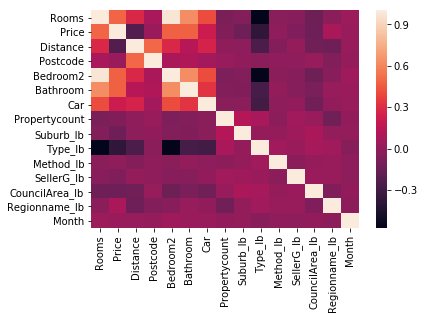

In [18]:
sns.heatmap(features.corr())

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

X = features[['Rooms', 'Distance', 'Postcode', 'Suburb_lb', 'Type_lb', 'Method_lb', 'SellerG_lb', 'CouncilArea_lb', 'Regionname_lb', 'Month']]
Y = features['Price']

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

np.set_printoptions(precision=3)
print(fit.scores_)

[  1580.823  11717.462   8441.789 117105.987   6287.917   1817.385
  96123.637  16559.812   2574.686   2554.713]


In [ ]:
selected_features = fit.transform(X)
print(selected_features)

[[  2.5   0.   24.   31. ]
 [  2.5   0.   24.   31. ]
 [  2.5   0.  161.   31. ]
 ...
 [  6.3 323.  228.   16. ]
 [  6.3 323.  105.   16. ]
 [  6.3 323.  199.   16. ]]


# Lasso Logistic Regression

In [ ]:
X_train = features[['Rooms', 'Distance', 'Postcode', 'Suburb_lb', 'Type_lb', 'Method_lb', 'SellerG_lb', 'CouncilArea_lb', 'Regionname_lb', 'Month']]
Y_train = features['Price']

lass = linear_model.Lasso(alpha=1)
lassfit = lass.fit(X_train, Y_train)
print('R²:')
print(lass.score(X_train, Y_train))

from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(lass, X_train, Y_train, cv=8)
print('\nCross validation:')
print(cross_val_score)

origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates:')
print(origparams)

R²:
0.4891462096861882

Cross validation:
[0.544 0.553 0.451 0.533 0.383 0.446 0.412 0.408]

Parameter estimates:
[ 3.172e+05 -5.419e+04  1.542e+03 -6.453e+02 -1.990e+05 -1.986e+03
 -2.003e+02 -7.618e+03  1.713e+04  1.638e+03 -3.829e+06]


# Random Forest Regressor

In [34]:
rfc = ensemble.RandomForestRegressor(n_estimators=300)

X = features[['Rooms', 'Distance', 'Postcode', 'Suburb_lb', 'Type_lb', 'Method_lb', 'SellerG_lb', 'CouncilArea_lb', 'Regionname_lb', 'Month']]
Y = features['Price']

score = cross_val_score(rfc, X, Y, cv=5)
print(score)
print('Accuracy: %0.2f (+/- %0.2f)' % (score.mean(), score.std() * 2))

[0.68790261 0.62276792 0.73595994 0.72281047 0.7325587 ]
Accuracy: 0.70 (+/- 0.08)
